## 생각들. 
* rating -> 리뷰어들의 생각만 들어감. decision -> 컨퍼런스 에디터들의 생각도 함께 들어감. 후자가 좀 더 큰 구분이니 이걸로 해보자. 
* 일단 분포 자체가 long-tailed라 대표값이 큰 의미가 있음.
* 의미있는 대푯값을 발견해도, oral이라 더 "광고"되어 더 인용된 건지, 아니면 실제로 더 가치있는 논문이라 인용이 많은 것인지 모름.(후자겠지만)
* 세부 분야(CV, graph, RL 등등)별로 표준화가 필요할텐데, 그게 잘 될지 모름. 
* 스타-논문들(인용수 수백 이상)만 정성적으로 살펴볼까?


In [1]:
import pandas as pd
import sys
sys.path.append("..")
import utils
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations 

In [8]:
def get_binned_df_list(df, binning_list):
    bin_range = binning_list[-1]
    df_by_chunk = []
    for bin_range in binning_list:
        df_test = df.loc[(df.mean_rating >= bin_range[0]) & (df.mean_rating < bin_range[1])]
        df_by_chunk.append(df_test)
        
    return df_by_chunk


def df_preprocessing(df):
    df["mean_rating"] = [np.mean(rating) for rating in df.rating]
    df["var_rating"] = [np.var(rating) for rating in df.rating]
    df["std_rating"] = [np.std(rating) for rating in df.rating]
    df["numer_of_ratings"] = [len(r) for r in df.rating]
    df = df.loc[df.numer_of_ratings > 1].reset_index(drop=True)

    return df

In [11]:
df_20 = pd.read_pickle("../data/ICLR2020/ICLR2020_preprocessed_table.pkl")
df_19 = pd.read_pickle("../data/ICLR2019/ICLR2019_preprocessed_table.pkl")
df_18 = pd.read_pickle("../data/ICLR2018/ICLR2018_preprocessed_table.pkl")
df_17 = pd.read_pickle("../data/ICLR2017/ICLR2017_preprocessed_table.pkl")

# calculating var&mean ratings, removing papers w/ num of ratings < 2
dfs = {"17": df_preprocessing(df_17),
       "18": df_preprocessing(df_18),
       "19": df_preprocessing(df_19),
       "20": df_preprocessing(df_20)}




,rating,decision,title,mean_rating,var_rating,citations,std_rating,numer_of_ratings
0,"[4, 9, 10, 7]",Accept (Poster),Exploration By Random Network Distillation,7.500000,5.250000,607.0,2.291288,4
1,"[7, 6, 6]",Accept (Poster),Generating Multi-agent Trajectories Using Prog...,6.333333,0.222222,42.0,0.471405,3
2,"[8, 6, 6]",Accept (Poster),Stable Opponent Shaping In Differentiable Games,6.666667,0.888889,60.0,0.942809,3
3,"[4, 7, 6]",Accept (Poster),A Closer Look At Deep Learning Heuristics: Lea...,5.666667,1.555556,120.0,1.247219,3
4,"[6, 6, 6]",Accept (Poster),Feed-forward Propagation In Probabilistic Neur...,6.000000,0.000000,13.0,0.000000,3


In [102]:
dfs["20"].head(8)

,rating,decision,authors,title,mean_rating,var_rating,citations,std_rating,numer_of_ratings
0,"[6, 6, 6]",Accept (Poster),b'Liyuan Liu#Haoming Jiang#Pengcheng He#Weizhu...,On The Variance Of The Adaptive Learning Rate ...,6.000000,0.000000,902.0,0.000000,3
1,"[6, 6, 6]",Accept (Poster),b'Felix Hill#Andrew Lampinen#Rosalia Schneider...,Emergent Systematic Generalization In A Situat...,6.000000,0.000000,21.0,0.000000,3
2,"[8, 8, 8]",Accept (Spotlight),b'Kailun Wu#Yiwen Guo#Ziang Li#Changshui Zhang',Sparse Coding With Gated Learned Ista,8.000000,0.000000,29.0,0.000000,3
3,"[8, 8, 8]",Accept (Talk),b'Archit Sharma#Shixiang Gu#Sergey Levine#Vika...,Dynamics-aware Unsupervised Skill Discovery,8.000000,0.000000,4.0,0.000000,3
4,"[6, 6, 6]",Accept (Poster),b'Pawel Korus#Nasir Memon',Quantifying The Cost Of Reliable Photo Authent...,6.000000,0.000000,0.0,0.000000,3
5,"[8, 6, 6]",Accept (Spotlight),b'Peter Sorrenson#Ullrich K\xc3\xb6the',Disentanglement Through Nonlinear Ica With Gen...,6.666667,0.888889,56.0,0.942809,3
6,"[8, 6, 6]",Accept (Poster),b'Yunhan Jia#Yantao Lu#Junjie Shen#Qi Alfred C...,Fooling Detection Alone Is Not Enough: Adversa...,6.666667,0.888889,34.0,0.942809,3
7,"[6, 6, 6]",Accept (Poster),b'Andrew Lampinen#Sebastien Racaniere#Adam San...,Automated Curriculum Generation Through Setter...,6.000000,0.000000,22.0,0.000000,3


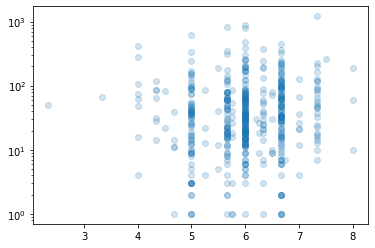

In [108]:
test_df = dfs["20"]
poster_df = test_df.loc[(test_df.decision == 'Accept (Poster)') & (test_df.citations != 0)].reset_index()
plt.scatter(poster_df.mean_rating, poster_df.citations, alpha=0.2)
plt.yscale("log")
# TODO: pearson corr -> rating vs logged citation
# log에 대한 당위성 서술해야함. 

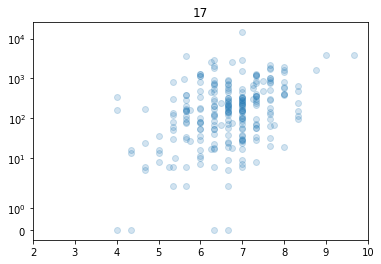

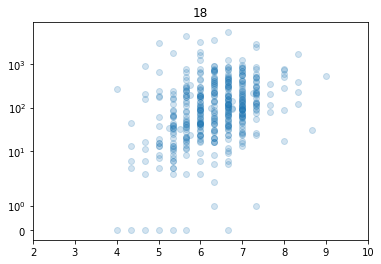

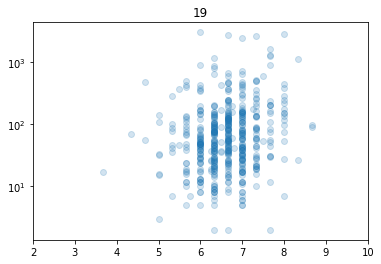

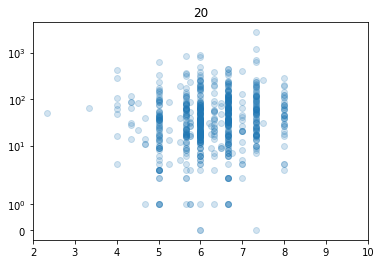

In [121]:
for year in ["17", "18", "19", "20"]:
    test_df = dfs[year]
    plt.scatter(test_df.mean_rating, test_df.citations, alpha=0.2)
    plt.yscale("symlog")
    plt.title(year)
    plt.xlim(2, 10)
    plt.show()
# poster_df = test_df.loc[(test_df.decision == 'Accept (Spotlight)')].reset_index()

# TODO: pearson corr -> rating vs logged citation
# log에 대한 당위성 서술해야함. 

In [12]:
for year, df in dfs.items():
    print(year, df.decision.unique())


17 ['Accept (Poster)' 'Invite to Workshop Track' 'Accept (Oral)']
18 ['Accept (Oral)' 'Accept (Poster)' 'Invite to Workshop Track']
19 ['Accept (Poster)' 'Accept (Oral)']
20 ['Accept (Poster)' 'Accept (Spotlight)' 'Accept (Talk)']


In [16]:
target_df = dfs["20"]
year = "20"

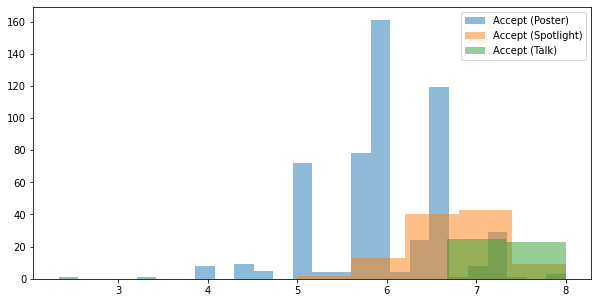

In [37]:
plt.figure(figsize=(10, 5))
plt.title("accept")
for decision in target_df["decision"].unique():
    target_list = df.loc[df.decision == decision, "mean_rating"].to_list()
    plt.hist(target_list,
#              density=True,
             bins=len(target_list) // 20,
             alpha=0.5,
             label=decision)
plt.legend()

## citation 상위 20%의 decision type을 보자

In [97]:

def get_citaion_vs_decision_result(year, target_df):
    print(f"#################\n## result 20{year} ##\n#################\n")

    sorted_df = target_df.sort_values(by="citations", ascending=False).reset_index(drop=True)

    df_top40 = sorted_df[:int(len(target_df)*0.4)].reset_index(drop=True)
    df_top20 = sorted_df[:len(target_df) // 5].reset_index(drop=True)
    df_top10 = sorted_df[:len(target_df) // 10].reset_index(drop=True)
    boundary40 = df_top40.citations.to_list()[-1]
    boundary20 = df_top20.citations.to_list()[-1]
    boundary10 = df_top10.citations.to_list()[-1]

    print("top 40% citation boundary:", int(boundary40))
    print("top 20% citation boundary:", int(boundary20))
    print("top 10% citation boundary:", int(boundary10))
    print("\n")    
    decision_list = target_df.decision.unique()

    whole_counts_by_decision = target_df.groupby(target_df.decision)["citations"].count().to_dict()
    top40_counts_by_decision = df_top40.groupby(df_top40.decision)["citations"].count().to_dict()
    top20_counts_by_decision = df_top20.groupby(df_top20.decision)["citations"].count().to_dict()
    top10_counts_by_decision = df_top10.groupby(df_top10.decision)["citations"].count().to_dict()

    print("whole paper counts by decisions")
    print(whole_counts_by_decision)
    print("\ntop 40% paper counts by decisions")
    print(top40_counts_by_decision)
    print("\ntop 20% paper counts by decisions")
    print(top20_counts_by_decision)
    print("\ntop 10% paper counts by decisions")
    print(top10_counts_by_decision, "\n")


    print("\n")    
    for decision in decision_list:
        ratio = top40_counts_by_decision[decision] / whole_counts_by_decision[decision]
        print(f"{decision}, top40 ratio: {round(ratio, 3)}")

    print("\n")
    for decision in decision_list:
        ratio = top20_counts_by_decision[decision] / whole_counts_by_decision[decision]
        print(f"{decision}, top20 ratio: {round(ratio, 3)}")

    print("\n")
    for decision in decision_list:
        ratio = top10_counts_by_decision[decision] / whole_counts_by_decision[decision]
        print(f"{decision}, top10 ratio: {round(ratio, 3)}")

    
################    
#### figure ####
################

# plt.figure(figsize=(10, 5))

# plt.title("Rating historgram by decisions")
# for decision in target_df["decision"].unique():
#     target_list = df.loc[df.decision == decision, "mean_rating"].to_list()
#     plt.hist(target_list,
# #              density=True,
#              bins=len(target_list) // 20,
#              alpha=0.5,
#              label=decision)
# plt.legend()

# plt.show()

# target_df = dfs["20"]
year = "20"
get_citaion_vs_decision_result(year, dfs[year])

#################
## result 2020 ##
#################

top 40% citation boundary: 49
top 20% citation boundary: 89
top 10% citation boundary: 164


whole paper counts by decisions
{'Accept (Poster)': 532, 'Accept (Spotlight)': 107, 'Accept (Talk)': 48}

top 40% paper counts by decisions
{'Accept (Poster)': 198, 'Accept (Spotlight)': 50, 'Accept (Talk)': 26}

top 20% paper counts by decisions
{'Accept (Poster)': 95, 'Accept (Spotlight)': 29, 'Accept (Talk)': 13}

top 10% paper counts by decisions
{'Accept (Poster)': 48, 'Accept (Spotlight)': 14, 'Accept (Talk)': 6} 



Accept (Poster), top40 ratio: 0.372
Accept (Spotlight), top40 ratio: 0.467
Accept (Talk), top40 ratio: 0.542


Accept (Poster), top20 ratio: 0.179
Accept (Spotlight), top20 ratio: 0.271
Accept (Talk), top20 ratio: 0.271


Accept (Poster), top10 ratio: 0.09
Accept (Spotlight), top10 ratio: 0.131
Accept (Talk), top10 ratio: 0.125


In [98]:
year = "19"
get_citaion_vs_decision_result(year, dfs[year])

#################
## result 2019 ##
#################

top 40% citation boundary: 80
top 20% citation boundary: 150
top 10% citation boundary: 295


whole paper counts by decisions
{'Accept (Oral)': 24, 'Accept (Poster)': 478}

top 40% paper counts by decisions
{'Accept (Oral)': 17, 'Accept (Poster)': 183}

top 20% paper counts by decisions
{'Accept (Oral)': 12, 'Accept (Poster)': 88}

top 10% paper counts by decisions
{'Accept (Oral)': 8, 'Accept (Poster)': 42} 



Accept (Poster), top40 ratio: 0.383
Accept (Oral), top40 ratio: 0.708


Accept (Poster), top20 ratio: 0.184
Accept (Oral), top20 ratio: 0.5


Accept (Poster), top10 ratio: 0.088
Accept (Oral), top10 ratio: 0.333


In [99]:
year = "18"
get_citaion_vs_decision_result(year, dfs[year])

#################
## result 2018 ##
#################

top 40% citation boundary: 147
top 20% citation boundary: 341
top 10% citation boundary: 648


whole paper counts by decisions
{'Accept (Oral)': 23, 'Accept (Poster)': 313, 'Invite to Workshop Track': 89}

top 40% paper counts by decisions
{'Accept (Oral)': 16, 'Accept (Poster)': 135, 'Invite to Workshop Track': 19}

top 20% paper counts by decisions
{'Accept (Oral)': 10, 'Accept (Poster)': 67, 'Invite to Workshop Track': 8}

top 10% paper counts by decisions
{'Accept (Oral)': 4, 'Accept (Poster)': 32, 'Invite to Workshop Track': 6} 



Accept (Oral), top40 ratio: 0.696
Accept (Poster), top40 ratio: 0.431
Invite to Workshop Track, top40 ratio: 0.213


Accept (Oral), top20 ratio: 0.435
Accept (Poster), top20 ratio: 0.214
Invite to Workshop Track, top20 ratio: 0.09


Accept (Oral), top10 ratio: 0.174
Accept (Poster), top10 ratio: 0.102
Invite to Workshop Track, top10 ratio: 0.067


In [100]:
year = "17"
get_citaion_vs_decision_result(year, dfs[year])

#################
## result 2017 ##
#################

top 40% citation boundary: 241
top 20% citation boundary: 617
top 10% citation boundary: 1171


whole paper counts by decisions
{'Accept (Oral)': 15, 'Accept (Poster)': 183, 'Invite to Workshop Track': 47}

top 40% paper counts by decisions
{'Accept (Oral)': 13, 'Accept (Poster)': 80, 'Invite to Workshop Track': 5}

top 20% paper counts by decisions
{'Accept (Oral)': 9, 'Accept (Poster)': 39, 'Invite to Workshop Track': 1}

top 10% paper counts by decisions
{'Accept (Oral)': 5, 'Accept (Poster)': 18, 'Invite to Workshop Track': 1} 



Accept (Poster), top40 ratio: 0.437
Invite to Workshop Track, top40 ratio: 0.106
Accept (Oral), top40 ratio: 0.867


Accept (Poster), top20 ratio: 0.213
Invite to Workshop Track, top20 ratio: 0.021
Accept (Oral), top20 ratio: 0.6


Accept (Poster), top10 ratio: 0.098
Invite to Workshop Track, top10 ratio: 0.021
Accept (Oral), top10 ratio: 0.333


### 작은 결과: Citation top 10/20/40% 논문들과 전체 논문들을 비교했을 때, poster보다 spotlight, oral 논문들이 top10/20/40%에 들어갈 확률이 더 높다. 
### 한계: 
* 세부 분야별로 citation수가 다른데, 이를 컨트롤하지 못함. 
* statistical power쪽 생각 안함. 
* oral accepted 연구의 경우 실제로 홍보가 더 잘 되었을 것. 

### 질문:
* invited to workshop -> 이건 accepted로 처리해야 하나?


## 이제 variance를 보자. 